In [1]:
import os
os.getcwd()

'C:\\Users\\User\\Desktop\\Python\\Hockey'

In [2]:
import requests
import pickle# Set up the API call variables
game_data = []
year = '2019'
season_type = '02' 
max_game_ID = 1290

In [3]:
# Loop over the counter and format the API call
for i in range(0,max_game_ID):
    r = requests.get(url='http://statsapi.web.nhl.com/api/v1/game/'
        + year + season_type +str(i).zfill(4)+'/feed/live')    
    data = r.json()
    game_data.append(data)

In [39]:
type(game_data)

list

In [4]:
#with open('./input/NHLData/'+year+'FullDataset.pkl', 'wb') as f:
#    pickle.dump(game_data, f, pickle.HIGHEST_PROTOCOL)

In [5]:
import numpy as np 
import pandas as pd 
import pickle    
import matplotlib
import matplotlib.pyplot as plt
color_map = plt.cm.winter
from matplotlib.patches import RegularPolygon
import math
from PIL import Image# Needed for custom colour mapping!
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import matplotlib.colors as mcolors

In [6]:
#ListedColorMap = colors.ListedColorMap
c = mcolors.ColorConverter().to_rgb
positive_cm = ListedColormap([c('#e1e5e5'),c('#d63b36')])
negative_cm = ListedColormap([c('#e1e5e5'),c('#28aee4')]) 

In [7]:
with open('./input/NHLData/2019FullDataset.pkl', 'rb') as f:
    game_data = pickle.load(f)

In [8]:
flat_list = []
for sublist in game_data:
    for item in sublist:
        flat_list.append(item)

In [42]:
flat_list

['messageNumber',
 'message',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gamePk',
 'link',
 'metaData',
 'gameData',
 'liveData',
 'copyright',
 'gameP

In [9]:
df = pd.DataFrame(game_data,)

In [10]:
df.head()

,messageNumber,message,copyright,gamePk,link,metaData,gameData,liveData
0,2.0,Game data couldn't be found,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NHL and the NHL Shield are registered trademar...,2.019020e+09,/api/v1/game/2019020001/feed/live,"{'wait': 10, 'timeStamp': '20191106_204348'}","{'game': {'pk': 2019020001, 'season': '2019202...",{'plays': {'allPlays': [{'result': {'event': '...
2,NaN,NaN,NHL and the NHL Shield are registered trademar...,2.019020e+09,/api/v1/game/2019020002/feed/live,"{'wait': 10, 'timeStamp': '20191106_204355'}","{'game': {'pk': 2019020002, 'season': '2019202...",{'plays': {'allPlays': [{'result': {'event': '...
3,NaN,NaN,NHL and the NHL Shield are registered trademar...,2.019020e+09,/api/v1/game/2019020003/feed/live,"{'wait': 10, 'timeStamp': '20191106_204404'}","{'game': {'pk': 2019020003, 'season': '2019202...",{'plays': {'allPlays': [{'result': {'event': '...
4,NaN,NaN,NHL and the NHL Shield are registered trademar...,2.019020e+09,/api/v1/game/2019020004/feed/live,"{'wait': 10, 'timeStamp': '20191106_204412'}","{'game': {'pk': 2019020004, 'season': '2019202...",{'plays': {'allPlays': [{'result': {'event': '...


In [11]:
df[~df['liveData'].isna()]['liveData']

1       {'plays': {'allPlays': [{'result': {'event': '...
2       {'plays': {'allPlays': [{'result': {'event': '...
3       {'plays': {'allPlays': [{'result': {'event': '...
4       {'plays': {'allPlays': [{'result': {'event': '...
5       {'plays': {'allPlays': [{'result': {'event': '...
                              ...                        
1267    {'plays': {'allPlays': [], 'scoringPlays': [],...
1268    {'plays': {'allPlays': [], 'scoringPlays': [],...
1269    {'plays': {'allPlays': [], 'scoringPlays': [],...
1270    {'plays': {'allPlays': [], 'scoringPlays': [],...
1271    {'plays': {'allPlays': [], 'scoringPlays': [],...
Name: liveData, Length: 1271, dtype: object

In [12]:
df2=pd.DataFrame(list(df[~df['liveData'].isna()]['liveData']))

In [13]:
df3=pd.DataFrame(list(df2[~df2['plays'].isna()]['plays']))
df3

,allPlays,scoringPlays,penaltyPlays,playsByPeriod,currentPlay
0,"[{'result': {'event': 'Game Scheduled', 'event...","[4, 145, 165, 172, 181, 232, 314, 362]","[9, 33, 49, 194, 227, 236, 285, 296]","[{'startIndex': 0, 'plays': [0, 1, 2, 3, 4, 5,...","{'result': {'event': 'Game Official', 'eventCo..."
1,"[{'result': {'event': 'Game Scheduled', 'event...","[9, 41, 66, 161, 305]","[36, 50, 106, 147, 227]","[{'startIndex': 0, 'plays': [0, 1, 2, 3, 4, 5,...","{'result': {'event': 'Game Official', 'eventCo..."
2,"[{'result': {'event': 'Game Scheduled', 'event...","[33, 175, 256, 262, 278]","[20, 148, 173, 177, 194, 240]","[{'startIndex': 0, 'plays': [0, 1, 2, 3, 4, 5,...","{'result': {'event': 'Game Official', 'eventCo..."
3,"[{'result': {'event': 'Game Scheduled', 'event...","[30, 38, 82, 130, 262]","[25, 42, 45, 63, 65, 152, 198, 257, 319]","[{'startIndex': 0, 'plays': [0, 1, 2, 3, 4, 5,...","{'result': {'event': 'Game Official', 'eventCo..."
4,"[{'result': {'event': 'Game Scheduled', 'event...","[27, 104, 141, 234, 237, 264, 283]","[8, 113, 133, 222, 231, 248, 252]","[{'startIndex': 0, 'plays': [0, 1, 2, 3, 4, 5,...","{'result': {'event': 'Game Official', 'eventCo..."
...,...,...,...,...,...
1266,[],[],[],[],NaN
1267,[],[],[],[],NaN
1268,[],[],[],[],NaN
1269,[],[],[],[],NaN


In [14]:
df4=pd.DataFrame(list(df3[~df3['allPlays'].isna()]['allPlays']))
df4

,0,1,2,3,4,5,6,7,8,9,...,454,455,456,457,458,459,460,461,462,463
0,"{'result': {'event': 'Game Scheduled', 'eventC...","{'result': {'event': 'Period Ready', 'eventCod...","{'result': {'event': 'Period Start', 'eventCod...","{'players': [{'player': {'id': 8475166, 'fullN...","{'players': [{'player': {'id': 8480801, 'fullN...","{'players': [{'player': {'id': 8476919, 'fullN...","{'players': [{'player': {'id': 8479458, 'fullN...","{'result': {'event': 'Stoppage', 'eventCode': ...","{'players': [{'player': {'id': 8473573, 'fullN...","{'players': [{'player': {'id': 8474589, 'fullN...",...,None,None,None,None,None,None,None,None,None,None
1,"{'result': {'event': 'Game Scheduled', 'eventC...","{'result': {'event': 'Period Ready', 'eventCod...","{'result': {'event': 'Period Start', 'eventCod...","{'players': [{'player': {'id': 8473563, 'fullN...","{'result': {'event': 'Stoppage', 'eventCode': ...","{'players': [{'player': {'id': 8473563, 'fullN...","{'players': [{'player': {'id': 8474590, 'fullN...","{'players': [{'player': {'id': 8475765, 'fullN...","{'players': [{'player': {'id': 8475768, 'fullN...","{'players': [{'player': {'id': 8478104, 'fullN...",...,None,None,None,None,None,None,None,None,None,None
2,"{'result': {'event': 'Game Scheduled', 'eventC...","{'result': {'event': 'Period Ready', 'eventCod...","{'result': {'event': 'Period Start', 'eventCod...","{'players': [{'player': {'id': 8477500, 'fullN...","{'players': [{'player': {'id': 8478402, 'fullN...","{'players': [{'player': {'id': 8471707, 'fullN...","{'players': [{'player': {'id': 8474091, 'fullN...","{'players': [{'player': {'id': 8476454, 'fullN...","{'players': [{'player': {'id': 8476454, 'fullN...","{'players': [{'player': {'id': 8476326, 'fullN...",...,None,None,None,None,None,None,None,None,None,None
3,"{'result': {'event': 'Game Scheduled', 'eventC...","{'result': {'event': 'Period Ready', 'eventCod...","{'result': {'event': 'Period Start', 'eventCod...","{'players': [{'player': {'id': 8476539, 'fullN...","{'result': {'event': 'Stoppage', 'eventCode': ...","{'players': [{'player': {'id': 8476539, 'fullN...","{'result': {'event': 'Stoppage', 'eventCode': ...","{'players': [{'player': {'id': 8480780, 'fullN...","{'players': [{'player': {'id': 8475188, 'fullN...","{'players': [{'player': {'id': 8477220, 'fullN...",...,None,None,None,None,None,None,None,None,None,None
4,"{'result': {'event': 'Game Scheduled', 'eventC...","{'result': {'event': 'Period Ready', 'eventCod...","{'result': {'event': 'Period Start', 'eventCod...","{'players': [{'player': {'id': 8477493, 'fullN...","{'players': [{'player': {'id': 8477493, 'fullN...","{'players': [{'player': {'id': 8478569, 'fullN...","{'players': [{'player': {'id': 8476875, 'fullN...","{'players': [{'player': {'id': 8474098, 'fullN...","{'players': [{'player': {'id': 8479410, 'fullN...","{'players': [{'player': {'id': 8474564, 'fullN...",...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1267,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1268,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1269,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [15]:
# Do some dictionary initialisation to hold our cleaned and condensed league data
league_data = {};
league_data['Shot'] = {};
league_data['Shot']['x'] = [];
league_data['Shot']['y'] = [];
league_data['Goal'] = {};
league_data['Goal']['x'] = [];
league_data['Goal']['y'] = [];

In [16]:
event_types = ['Shot','Goal']

In [17]:
# First loop over the elements of game_data. Each one of these is an NHL game and contains all of the game event data.
for data in game_data:   # It is possible that the game data is not assigned to the data
   #set, so to handle this we look for the key ‘liveData’ which 
   #contains all of the data we are looking for, otherwise we
   #continue
    if 'liveData' not in data:
        continue   # Drilling down into the dataset to extract the play by play
   #information for the game
    plays = data['liveData']['plays']['allPlays'] 
    for play in plays: # For each play
        for event in event_types:  # For each event (Shot,Goal)            # If the play contains one of the events
            if play['result']['event'] in [event]:                # If the event contains coordinates
                if 'x' in play['coordinates']:                  # Save the coordinates to the growing list
                    league_data[event]['x'].append(play['coordinates']['x'])
                    league_data[event]['y'].append(play['coordinates']['y'])

In [18]:
# Initialise the player dictionary
full_name = 'Alex Ovechkin'
player_data = {};player_data['Shot'] = {};
player_data['Shot']['x'] = [];
player_data['Shot']['y'] = [];player_data['Goal'] = {};
player_data['Goal']['x'] = [];
player_data['Goal']['y'] = [];

In [19]:
count=0
eventCount=0
# First loop over the elements of game_data. Each one of these is an NHL game and contains all of the game event data.
for data in game_data:   # It is possible that the game data is not assigned to the data
   #set, so to handle this we look for the key ‘liveData’ which 
   #contains all of the data we are looking for, otherwise we
   #continue
    if 'liveData' not in data:
        continue   # Drilling down into the dataset to extract the play by play
   #information for the game
    plays = data['liveData']['plays']['allPlays'] 
    
    for play in plays: # For each play
        if 'players' in play:
            for player in play['players']:
                 if player['player']['fullName'] in [full_name] and player['playerType'] in ["Shooter","Scorer"]:
                    count=count+1
                    for play in plays: # For each play
                        for event in event_types:  # For each event (Shot,Goal)            # If the play contains one of the events
                            eventCount=eventCount+1
                            if play['result']['event'] in [event]:# If the event contains coordinates
                                if 'x' in play['coordinates']:                  # Save the coordinates to the growing list
                                    player_data[event]['x'].append(play['coordinates']['x'])
                                    player_data[event]['y'].append(play['coordinates']['y'])
                                    
print(count)
print(eventCount)

606
397820


In [20]:
# Get the total number of shots made by the player
player_total_shots = len(player_data['Shot']['x']) +\
   len(player_data['Goal']['x'])# Find the players goal score percentage
player_goal_pct = len(player_data['Goal']['x'])/player_total_shots# Find the total number of shots taken in the league
league_total_shots = len(league_data['Shot']['x']) +\
   len(league_data['Goal']['x'])# Get the league percentage
league_goal_pct = len(league_data['Goal']['x'])/league_total_shots# Calculate the spread of the SOG (Shots on Goal) %
PL_e_spread = player_goal_pct-league_goal_pct

In [21]:
# To keep the aspect ration correct we use a square figure size
xbnds = np.array([-100.,100.0])
ybnds = np.array([-100,100])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]# We are going to bin in 30 unit increments.  It is fun to play with this!  
gridsize= 30;mincnt=0

In [22]:
# To keep the aspect ration correct we use a square figure size
xbnds = np.array([-100.,100.0])
ybnds = np.array([-100,100])
extent = [xbnds[0],xbnds[1],ybnds[0],ybnds[1]]# We are going to bin in 30 unit increments.  It is fun to play with this!  
gridsize= 30;mincnt=0

In [23]:
# First concatenate the arrays for x and y league data
league_x_all_shots = league_data['Shot']['x'] \
   + league_data['Goal']['x'];
league_y_all_shots = league_data['Shot']['y'] \
   + league_data['Goal']['y']# Perform the coordinate flipping!
league_x_all_shots_normalized = [];
league_y_all_shots_normalized = []# Enumerate the list so we can use the index for y also
for i,s in enumerate(league_x_all_shots):
    if league_x_all_shots[i] <0:
        league_x_all_shots_normalized.append(-league_x_all_shots[i])
        league_y_all_shots_normalized.append(-league_y_all_shots[i])
    else:
        league_x_all_shots_normalized.append(league_x_all_shots[i])
        league_y_all_shots_normalized.append(league_y_all_shots[i])
        
# Do the same treatment for the goals
league_x_goal_normalized = [];
league_y_goal_normalized=[]
for i,s in enumerate(league_data['Goal']['x']):
    if league_data['Goal']['x'][i] <0:
        league_x_goal_normalized.append(-league_data['Goal']['x'][i])
        league_y_goal_normalized.append(-league_data['Goal']['y'][i])
    else:
        league_x_goal_normalized.append(league_data['Goal']['x'][i])
        league_y_goal_normalized.append(league_data['Goal']['y'][i])

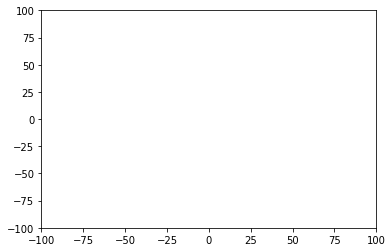

In [24]:
# First we will used the hexbin function to simply bucket our shot data into basically a 2D histogram
league_hex_data = plt.hexbin(league_x_all_shots_normalized,
   league_y_all_shots_normalized,gridsize=gridsize,
   extent=extent,mincnt=mincnt,alpha=0.0)# Now we extract the bin coordinates and counts
league_verts = league_hex_data.get_offsets();
league_shot_frequency = league_hex_data.get_array();# Do the same thing for the goal data

league_goal_hex_data =  plt.hexbin(league_x_goal_normalized,
   league_y_goal_normalized,gridsize=gridsize,
   extent=extent,mincnt=mincnt,alpha=0.0)# Since the grid is the same we can use a shared bin coordinate set from the above. So here we just get the counts
league_goal_frequency = league_goal_hex_data.get_array();

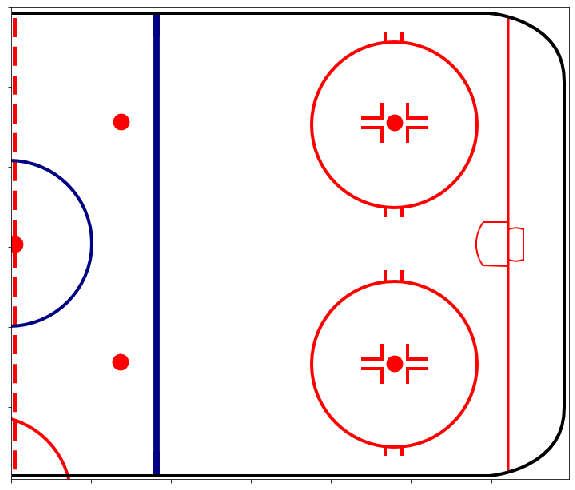

In [25]:
# Using matplotlib we create a new figure for plotting
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)# Clean up the figure to be completely blank
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
fig.patch.set_alpha(0.0)# Remove the labelling of axes
ax.set_xticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)
ax.set_yticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)# Using pillow to get the rink image and extract the image size
I = Image.open('./input/NHLImages/half.png')
ax.imshow(I);width, height = I.size

In [26]:
# Calculate the scaling factor and offset (trial and error)
scalingx=width/100-0.6;
scalingy=height/100+0.5;
x_trans=33;
y_trans=height/2# We will want to scale the size of our hex bins with the image so we calculate a "radius" scaling factor here
S = 3.8*scalingx;

In [27]:
# Loop over the locations and draw the hex
for i,v in enumerate(league_verts):   # Ignore empty locations
    if league_shot_frequency[i] < 1:continue
    # Normalize the shot frequency data between 0-1 
    scaled_league_shot_frequency =league_shot_frequency[i]/max(league_shot_frequency)# Scale the hexagon size based on shot frequency
    radius = S*math.sqrt(scaled_league_shot_frequency)   # Finally we will plot the hexagon including the scaling and
    #translations we found earlier
    hex = RegularPolygon((x_trans+v[0]*scalingx, \
      y_trans-v[1]*scalingy),numVertices=6, radius=radius,\
      orientation=np.radians(0),alpha=0.5, edgecolor=None)   
    ax.add_patch(hex)

In [28]:
player_x_all_shots = player_data['Shot']['x'] \
  + player_data['Goal']['x'];
player_y_all_shots = player_data['Shot']['y'] \
      + player_data['Goal']['y']

In [29]:
# First concatenate the arrays for x and y league data
player_x_all_shots = player_data['Shot']['x'] \
   + player_data['Goal']['x'];
player_y_all_shots = player_data['Shot']['y'] \
   + player_data['Goal']['y']# Perform the coordinate flipping!
player_x_all_shots_normalized = [];
player_y_all_shots_normalized = []# Enumerate the list so we can use the index for y also
for i,s in enumerate(player_x_all_shots):
    if player_x_all_shots[i] <0:
        player_x_all_shots_normalized.append(-player_x_all_shots[i])
        player_y_all_shots_normalized.append(-player_y_all_shots[i])
    else:
        player_x_all_shots_normalized.append(player_x_all_shots[i])
        player_y_all_shots_normalized.append(player_y_all_shots[i])
        
# Do the same treatment for the goals
player_x_goal_normalized = [];
player_y_goal_normalized=[]
for i,s in enumerate(player_data['Goal']['x']):
    if player_data['Goal']['x'][i] <0:
        player_x_goal_normalized.append(-player_data['Goal']['x'][i])
        player_y_goal_normalized.append(-player_data['Goal']['y'][i])
    else:
        player_x_goal_normalized.append(player_data['Goal']['x'][i])
        player_y_goal_normalized.append(player_data['Goal']['y'][i])

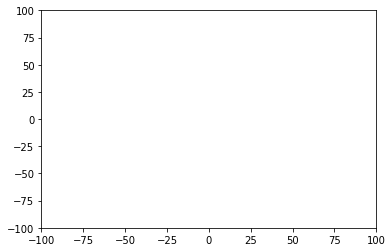

In [30]:
player_hex_data = plt.hexbin(player_x_all_shots_normalized,
   player_y_all_shots_normalized,gridsize=gridsize,
   extent=extent,mincnt=mincnt,alpha=0.0)
player_verts = player_hex_data.get_offsets();
player_shot_frequency = player_hex_data.get_array()

player_goal_hex_data =  plt.hexbin(player_x_goal_normalized,
   player_y_goal_normalized,gridsize=gridsize,
   extent=extent,mincnt=mincnt,alpha=0.0)# Since the grid is the same we can use a shared bin coordinate set from the above. So here we just get the counts
player_goal_frequency = player_goal_hex_data.get_array();

In [31]:
gridsize

30

In [32]:
# Get some lists initialised 
league_efficiency = []
player_efficiency = []
relative_efficiency = []# Looping over the league shots (which are the same in length as player)
for i in range(0,len(league_shot_frequency)):    # We will only look at positions on the ice where the player or
    #league had more than two shots during the season
    if league_shot_frequency[i]<2 or player_shot_frequency[i]<2:
        continue

# Calculate the efficiencies 
league_efficiency.append(\
   league_goal_frequency[i]/league_shot_frequency[i])
    
player_efficiency.append(\
   player_goal_frequency[i]/player_shot_frequency[i])
    
# And the relative efficiency
relative_efficiency.append(\
    (player_goal_frequency[i]/player_shot_frequency[i]-\
     (league_goal_frequency[i]/league_shot_frequency[i])))
                           # Keep track of the max so we can scale the colour and radius of the hex plot after
max_league_efficiency=max(league_efficiency)
max_player_efficiency = max(player_efficiency)
max_relative_efficiency = max(relative_efficiency)
min_relative_efficiency = min(relative_efficiency)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


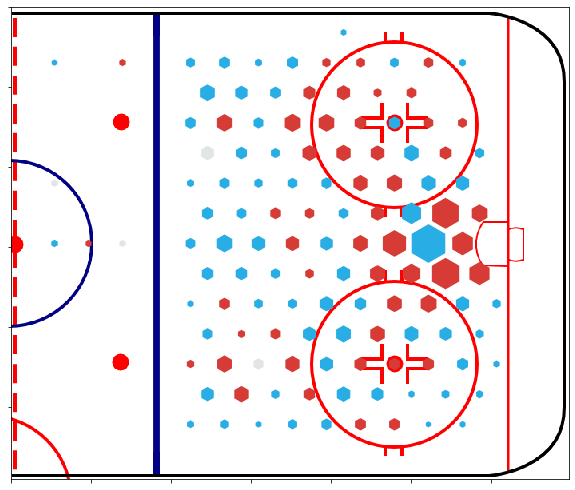

In [33]:
# Using matplotlib we create a new figure for plotting
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)# Clean up the figure to be completely blank
ax.set_facecolor("white")
fig.patch.set_facecolor("white")
fig.patch.set_alpha(0.0)# Remove the labelling of axes
ax.set_xticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)
ax.set_yticklabels(labels = [''], fontsize = 18,
   alpha = .7,minor=False)# Using pillow to get the rink image and extract the image size
I = Image.open('./input/NHLImages/half.png')
ax.imshow(I);width, height = I.size

# Loop over the locations and draw the hex
for i,v in enumerate(player_verts):    # Here we will only include locations where the player made at
   # least on shot.  We will adjust this later for plotting.
    if player_shot_frequency[i] > 50:

        # Scaling the frequencies
        scaled_player_shot_frequency =player_shot_frequency[i]/max(player_shot_frequency)    # Calculate a radius of the hex
        radius = S*math.sqrt(scaled_player_shot_frequency)

        # Find the player efficiency and relative at this point on the
        #ice.  
        player_efficiency =player_goal_frequency[i]/player_shot_frequency[i]
        league_efficiency =league_goal_frequency[i]/league_shot_frequency[i]    # This is what we were after the whole time!   
        relative_efficiency = player_efficiency - league_efficiency

        # Since there can be positive and negative efficiencies
        #(relative) we colour the more efficient locations red and the
        #less blue.
        if relative_efficiency>0:
            colour = positive_cm(math.pow(relative_efficiency,0.1))
        else:
            colour = negative_cm(math.pow(-relative_efficiency,0.1))

        # And finally we plot!    
        hex = RegularPolygon((x_trans+v[0]*scalingx,
           y_trans-v[1]*scalingy),numVertices=6, radius=radius,
           orientation=np.radians(0),facecolor=colour,alpha=1,
           edgecolor=None)
        ax.add_patch(hex)

In [34]:
sum(player_shot_frequency)

38484.0